<center>
<h1> Assignment 3: Regression Analysis</h1>
<hr>
<h2>Predict The Bay Area’s Home Prices</h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: Mar 9th, 2021 (Tuesday)</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr. Ashraf Bhuiyan </h4>


</center>

### Please put your name, student ID, date and time here (5 points)
* Name: Saranya Balasubramaniyan
* Student ID: 999901316
* Date: March 03, 2022
* Time: 12:40PM

### Instructions
* In this assignment, you will investigate the housing price dataset from Bay Area Home Sales Database and Zillow to Predict The Bay Area’s Home Prices.
* This dataset was based on the homes sold between January 2013 and December 2015.
* Please use all the techniques we have learned in the class to preprocesss/clean the dataset.
* You can drop redundant features.
<p style="color:blue"><b>final_data.csv</b></p>
* Please apply the folowing four methods to Predict The Bay Area’s Home Prices.

<h3>Method 1: Multiple Linear Regression</h3>

* Bulding the optimal model using Automatic implementations of Backward Elimination
```
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
```
* <mark>Split the dataset into training sets and test sets</mark>

* Fit LinearRegression to the training sets 
* Print the Linear Regression R squared score on the test sets
* Print the Linear Regression RMSE score on the test sets

<h3>Method 2: Least Absolute Shrinkage and Selection Operator(Lasso)</h3>

* Fit Lasso to the training sets. 
* Print the Lasso R squared score on the test sets
* Print the Lasso RMSE score on the test sets

<h3>Method 3: Decision Tree </h3>

* Fit Decision Tree to the training set. 
* Print the Decision Tree R squared score on the test sets
* Print the Decision Tree RMSE score on the test sets

<h3>Method 4: Random Forest </h3>

* Fit Random Forest to the training sets. 
* Print the Random Forest R squared score on the test sets
* Print the Random Forest RMSE score on the test sets

## 1. Import dataset "final_data.csv" in pandas (5 points)

In [39]:
# importing pandas package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data frame assigned to the date read from csv file 
dataset = pd.read_csv('final_data.csv')

print("************* Column Information **************")
print(dataset.info())
#dataset.head()

print()
print("************* Analysis on the data **************")
dataset.describe()

************* Column Information **************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  int64  
 6   finishedsqft   11330 non-null  int64  
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  int64  
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  int64  
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  int64  
 15  zestimate      11330 non-null  int64  
 16  zindexvalue    11330 non-null  object 
 17  zi

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


## 2. Preprocess/Clean the Dataset(20 points)

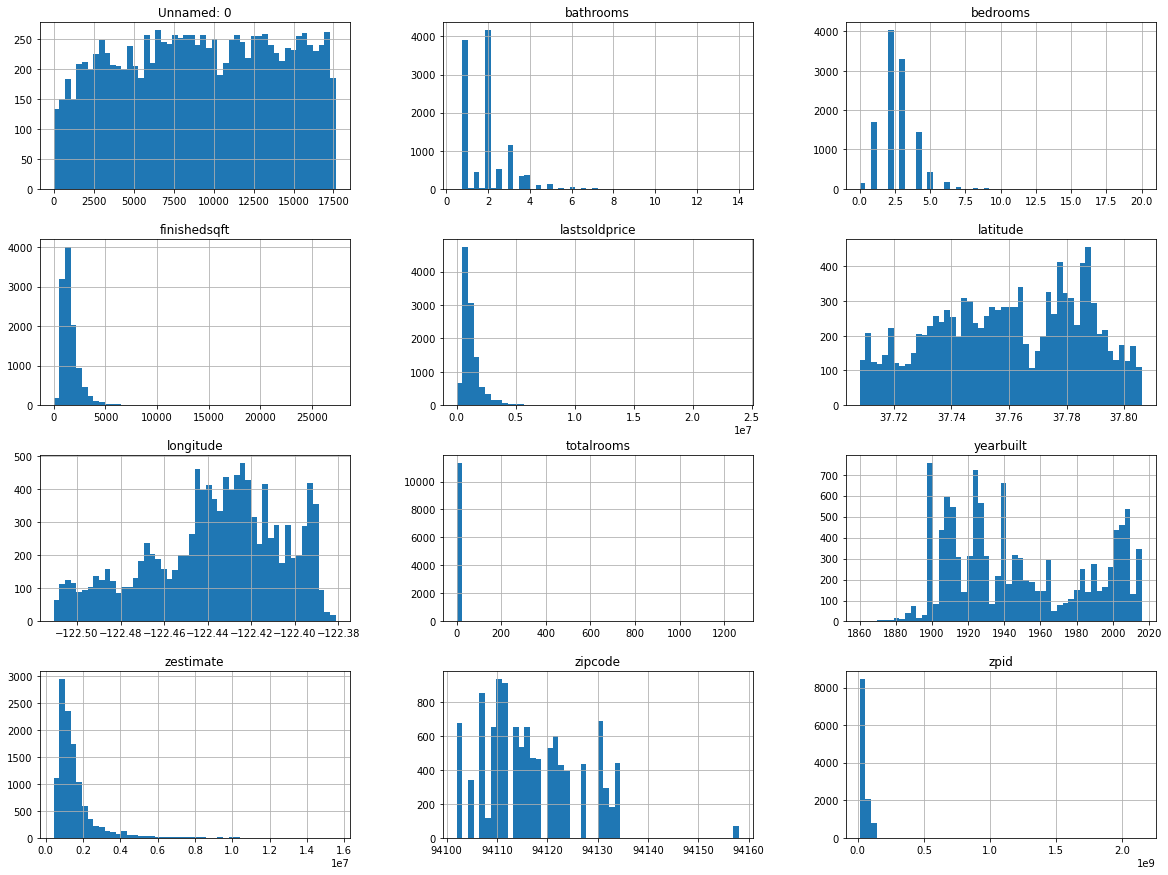

Least value of Last Sold Price : 535
Highest value of Last Sold Price : 23889000

********* Histogram - Plotting for Last Sold Price ***********


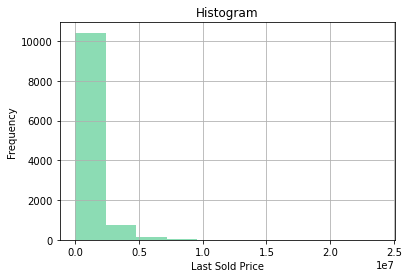

********* Histogram - Plotting for Last Sold Price and zestimate ***********


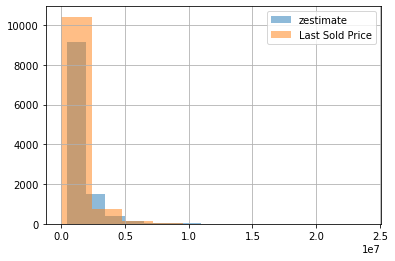

****** usecode Column analysis ********
SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Apartment              3
Cooperative            3
Mobile                 2
MultiFamily5Plus       2
Name: usecode, dtype: int64

*************** Plotting bar graph with the usecode column ***************



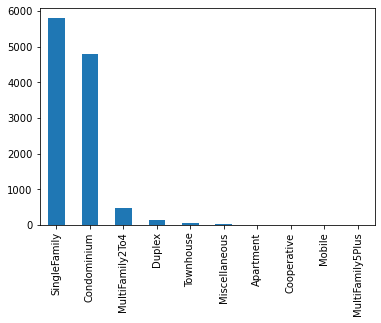

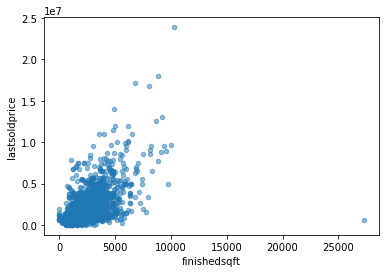

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

#---------------Histograms and graphs -------------------#
#Plotting Histogram
dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

#Target : lastsoldprice column
#features: reset of columns except lastsoldprice
X = dataset.drop('lastsoldprice', axis=1)
y = dataset['lastsoldprice']

print("Least value of Last Sold Price : " + str(dataset.lastsoldprice.min()))
print("Highest value of Last Sold Price : " + str(dataset.lastsoldprice.max()))
print()

#Histogram - Plotting for Last Sold Price
print("********* Histogram - Plotting for Last Sold Price ***********")
plt.hist(y,color='#8cdcb4')
plt.xlabel('Last Sold Price')
plt.ylabel('Frequency')
plt.title('Histogram')
#Using Grids
plt.grid()
plt.show()

#Plotting Histogram to compare the zestimate and LastSoldPrice
print("********* Histogram - Plotting for Last Sold Price and zestimate ***********")
plt.hist(X['zestimate'],alpha=0.5, label='zestimate')
plt.hist(y, alpha=0.5, label='Last Sold Price')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#Plotting bar graph with the usecode column since the values are string
print("****** usecode Column analysis ********")
print(X['usecode'].value_counts())
print()
print("*************** Plotting bar graph with the usecode column ***************")
X['usecode'].value_counts().plot(kind='bar')
print()

#Plotting scatter graph based on LastSoldPrice
dataset.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

In [41]:
#Data Cleanup
import numpy as npy

#--------------------------- Dropping na values ------------------------------------------------
#Performing dropna call to remove any rows with Nan in them
print("Dataset size before filtering missing data : " + str(dataset.shape))
dataset.dropna(how='any',inplace=True)
print("Dataset size after dropna call : " + str(dataset.shape))
print()

#---------------------------- Handling 'neighborhood' column -------------------------------------
print("******* Analysis on neighborhood column **********")
print(dataset['neighborhood'].value_counts())

#Neighborhood column has around 71 unique values and to create dummies for the column, clustering is implemeneted
#To implement clustering, the neighborhood data is classified as low price, high price low freq and 
# high price high frequency neighborhood based on the price per sqft and the freequency in the neighborhood

#Creating a dataframe copy
dataset_UPDATED = dataset.copy()
#Caluculating the price per sqft using last sold price and finished sqft
dataset_UPDATED['price_per_sqft'] = dataset['lastsoldprice']/dataset['finishedsqft']
#calculating the correlation
corr_matrix = dataset_UPDATED.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

#Calculating the frequence using neighborhood and address
addressFrequency = dataset_UPDATED.groupby('neighborhood').count()['address']
#calcukating the average price in the neighborhood
priceMean = dataset_UPDATED.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([addressFrequency, priceMean], axis=1)
#Creating a cluster of column based on freqence, price per sqft and neigborhood
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()

#Condition for low price neighborhood
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

#Condition for high price, low frequency neighborhood
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

#Condition for high price, high frequency neighborhood
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

#function that assigns the neighborhood group based on the values obtained from the calculation above
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
    
#Creating a column neighbor_group with the values from the classificaton defined and calculated in the function above
dataset_UPDATED['neighbor_group'] = dataset_UPDATED.neighborhood.apply(get_group)

#------------------------ Conveting the column types to appropriate data types ----------------------
#zindexvalue : Contains comma in the numeric value, so first step is to remove the commas as a part of clean up
#before type casting to float
dataset_UPDATED["zindexvalue"] = dataset_UPDATED["zindexvalue"].str.replace(",","").astype(float)
#lastsolddate - Converting the last sold date to datetime datatype
dataset_UPDATED["lastsolddate"] =  pd.to_datetime(dataset_UPDATED["lastsolddate"],errors='coerce')
#Extracting the day from the date attribute
dataset_UPDATED["date_day"] = dataset_UPDATED["lastsolddate"].apply(lambda x:x.day)
#Extracting the month from the date attribute
dataset_UPDATED["date_month"] = dataset_UPDATED["lastsolddate"].apply(lambda x:x.month)
#Extracting the year from the date attribute
dataset_UPDATED["date_year"] = dataset_UPDATED["lastsolddate"].apply(lambda x:x.year)

print()
print("************** Evaluating the variance of Columns ********************")
print("Variance of bathrooms column : " + str(dataset_UPDATED["bathrooms"].var()))
print("Variance of bedrooms column : " + str(dataset_UPDATED["bedrooms"].var()))
print("Variance of finishedsqft column : " + str(dataset_UPDATED["finishedsqft"].var()))
print("Variance of totalrooms column : " + str(dataset_UPDATED["totalrooms"].var()))
print("Variance of yearbuilt column : " + str(dataset_UPDATED["yearbuilt"].var()))
print("Variance of zindexvalue column : " + str(dataset_UPDATED["zindexvalue"].var()))
print("Variance of zestimate column : " + str(dataset_UPDATED["zestimate"].var()))
print("Variance of zpid column : " + str(dataset_UPDATED["zpid"].var()))
print("Variance of zipcode column : " + str(dataset_UPDATED["zipcode"].var()))
print("Variance of latitude column : " + str(dataset_UPDATED["latitude"].var()))
print("Variance of longitude column : " + str(dataset_UPDATED["longitude"].var()))
print("Variance of lastsoldprice column : " + str(dataset_UPDATED["lastsoldprice"].var()))
print()
print("Variance value is very high for finishedsqft, totalrooms, zindexvalue, zestimate, zpid")
print("Normalizing the columns with high variance")
dataset_UPDATED["finishedsqft_log"] = npy.log(dataset_UPDATED['finishedsqft'])
dataset_UPDATED["totalrooms_log"] = npy.log(dataset_UPDATED['totalrooms'])
dataset_UPDATED["zindexvalue_log"] = npy.log(dataset_UPDATED['zindexvalue'])
dataset_UPDATED["zestimate_log"] = npy.log(dataset_UPDATED['zestimate'])
dataset_UPDATED["zpid_log"] = npy.log(dataset_UPDATED['zpid'])
dataset_UPDATED["lastsoldprice_log"] = npy.log(dataset_UPDATED['lastsoldprice'])
print("Variance after log normalizing the finishedsqft column: " + str(dataset_UPDATED['finishedsqft_log'].var()))
print("Variance after log normalizing the totalrooms column: " + str(dataset_UPDATED['totalrooms_log'].var()))
print("Variance after log normalizing the zindexvalue column: " + str(dataset_UPDATED['zindexvalue_log'].var()))
print("Variance after log normalizing the zestimate column: " + str(dataset_UPDATED['zestimate_log'].var()))
print("Variance after log normalizing the zpid column: " + str(dataset_UPDATED['zpid_log'].var()))
print("Variance after log normalizing the zpid column: " + str(dataset_UPDATED['zpid_log'].var()))
print("Variance after log normalizing the lastsoldprice column: " + str(dataset_UPDATED['lastsoldprice_log'].var()))

#----------------------------------Text vectorization -----------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
print()
print("------------- Performing text vectorization on address column---------------")
#Taking the address column in a dataframe for transformation
dataset_DESC = dataset_UPDATED["address"]
#Displaying the dataframe with desc column
print("Printing the samples of the desc column")
display(dataset_DESC.head())
# Creating the vectorizer method
tfidf_vec = TfidfVectorizer()
# Transforming the text in desc into tf-idf vectors
dataset_DESC_tfidf = tfidf_vec.fit_transform(dataset_DESC)
print("Size of the vectorized data frame :" + str(dataset_DESC_tfidf.shape))

print("--------------Feature Selection---------------")
print("Current columns in the ufo Data Sighting after processing : " + str(dataset_UPDATED.columns))
print()
print("****************** Correlation data *******************")
display(dataset_UPDATED[['bathrooms', 'bedrooms','finishedsqft', 'finishedsqft_log','totalrooms', 'totalrooms_log', 'yearbuilt','zindexvalue','zindexvalue_log', 'lastsoldprice','lastsoldprice_log','zestimate','zestimate_log','zpid','zpid_log','zipcode','date_month','date_year','date_day','latitude','longitude']].corr())

#Not including the address, info, z_address because the values are redundant
dataset_UPDATED = dataset_UPDATED[['bathrooms', 'bedrooms','finishedsqft', 'finishedsqft_log','totalrooms', 'totalrooms_log', 'usecode', 'yearbuilt','zindexvalue','zindexvalue_log', 'neighbor_group', 'lastsoldprice','lastsoldprice_log','zestimate','zestimate_log','zpid','zpid_log','zipcode','date_month','date_year','date_day','latitude','longitude']]
print()
print("***** Dataframe after the cleanup *********")
dataset_UPDATED.head()



Dataset size before filtering missing data : (11330, 19)
Dataset size after dropna call : (11330, 19)

******* Analysis on neighborhood column **********
Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

************** Evaluating the variance of Columns ********************
Variance of bathrooms column : 1.0969588139600586
Variance of bedrooms column : 1.6885891186628323
Variance of finishedsqft column : 850043.8846890674
Variance of totalrooms column : 147.03548286244057
Variance of yearbuilt column : 1437.2587572668847
Variance of zindexvalue column : 342010980437.37054
Variance of zestimate column : 1511466328085.2664
Variance of zpid column : 6085156512073886.0
Variance of zipcode column : 88.37649108658248
Variance of latitud

0    Address: 1160 Mission Street #2007
1         Address: 260 King Street #475
2       Address: 560 Missouri Street #B
3          Address: 350 Missouri Street
4           Address: 3658 Folsom Street
Name: address, dtype: object

Size of the vectorized data frame :(11330, 4349)
--------------Feature Selection---------------
Current columns in the ufo Data Sighting after processing : Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid', 'price_per_sqft',
       'neighbor_group', 'date_day', 'date_month', 'date_year',
       'finishedsqft_log', 'totalrooms_log', 'zindexvalue_log',
       'zestimate_log', 'zpid_log', 'lastsoldprice_log'],
      dtype='object')

****************** Correlation data *******************


,bathrooms,bedrooms,finishedsqft,finishedsqft_log,totalrooms,totalrooms_log,yearbuilt,zindexvalue,zindexvalue_log,lastsoldprice,...,zestimate,zestimate_log,zpid,zpid_log,zipcode,date_month,date_year,date_day,latitude,longitude
bathrooms,1.000000,0.714270,0.719096,0.662590,0.135171,0.597436,-0.094791,0.249193,0.241163,0.536880,...,0.603158,0.622546,-0.047326,-0.131664,0.090754,0.003920,-0.002153,0.011743,0.041632,-0.120276
bedrooms,0.714270,1.000000,0.697461,0.691704,0.155320,0.741967,-0.312583,0.164981,0.148597,0.395478,...,0.477676,0.529905,-0.101559,-0.280268,0.197236,0.008545,-0.011776,0.000675,-0.157859,-0.258338
finishedsqft,0.719096,0.697461,1.000000,0.848965,0.156913,0.696777,-0.283712,0.338131,0.333065,0.647208,...,0.758493,0.742265,-0.079424,-0.217190,0.126858,0.010884,-0.010375,0.013456,0.061655,-0.208110
finishedsqft_log,0.662590,0.691704,0.848965,1.000000,0.149500,0.731681,-0.312124,0.283499,0.291150,0.535036,...,0.616663,0.702526,-0.096385,-0.243739,0.157316,0.010283,-0.005592,0.008516,-0.013981,-0.245152
totalrooms,0.135171,0.155320,0.156913,0.149500,1.000000,0.325740,-0.061874,0.043554,0.043453,0.093527,...,0.111990,0.123513,-0.010918,-0.041725,0.034886,-0.007685,-0.010599,-0.002108,-0.007126,-0.054203
totalrooms_log,0.597436,0.741967,0.696777,0.731681,0.325740,1.000000,-0.396369,0.206647,0.205464,0.407618,...,0.479399,0.569326,-0.114871,-0.301013,0.223134,0.016638,-0.021741,-0.001901,-0.153412,-0.297662
yearbuilt,-0.094791,-0.312583,-0.283712,-0.312124,-0.061874,-0.396369,1.000000,-0.219629,-0.235467,-0.189055,...,-0.212563,-0.259656,0.187554,0.460767,-0.159110,-0.033102,-0.001052,0.021712,0.140987,0.289189
zindexvalue,0.249193,0.164981,0.338131,0.283499,0.043554,0.206647,-0.219629,1.000000,0.934375,0.460429,...,0.532031,0.562695,-0.020527,-0.053138,0.057600,0.004914,-0.009584,-0.002673,0.393080,-0.188348
zindexvalue_log,0.241163,0.148597,0.333065,0.291150,0.043453,0.205464,-0.235467,0.934375,1.000000,0.478910,...,0.534342,0.629166,-0.005929,-0.031910,0.023846,0.008251,-0.000787,-0.008056,0.485169,-0.210889
lastsoldprice,0.536880,0.395478,0.647208,0.535036,0.093527,0.407618,-0.189055,0.460429,0.478910,1.000000,...,0.876939,0.779672,-0.038444,-0.091554,0.018839,-0.023821,0.148134,-0.006854,0.283107,-0.052595



***** Dataframe after the cleanup *********


,bathrooms,bedrooms,finishedsqft,finishedsqft_log,totalrooms,totalrooms_log,usecode,yearbuilt,zindexvalue,zindexvalue_log,...,zestimate,zestimate_log,zpid,zpid_log,zipcode,date_month,date_year,date_day,latitude,longitude
0,2.0,2,1043,6.949856,4,1.386294,Condominium,2007,975700.0,13.790910,...,1167508,13.970382,83152781,18.236190,94103,2,2016,17,37.778705,-122.412635
1,1.0,1,903,6.805723,3,1.098612,Condominium,2004,975700.0,13.790910,...,823719,13.621585,69819817,18.061428,94107,2,2016,17,37.777641,-122.393417
2,4.0,3,1425,7.261927,6,1.791759,Condominium,2003,1277600.0,14.060494,...,1708594,14.351181,64972847,17.989480,94107,2,2016,17,37.759198,-122.396516
3,3.0,3,2231,7.710205,10,2.302585,SingleFamily,1927,1277600.0,14.060494,...,2411236,14.695650,15149489,16.533477,94107,2,2016,17,37.761886,-122.396769
4,3.0,3,1300,7.170120,4,1.386294,SingleFamily,1900,1248000.0,14.037053,...,1918539,14.467075,15161978,16.534301,94110,2,2016,17,37.740795,-122.413453


## 3. Method 1: Multiple Linear Regression (15 points)

In [47]:
X = dataset_UPDATED[['neighbor_group','zestimate','zindexvalue','usecode','bathrooms', 'bedrooms','yearbuilt','zpid_log','date_year','date_month','date_day','zipcode','latitude','longitude']]
Y = dataset_UPDATED['lastsoldprice']

n = pd.get_dummies(dataset_UPDATED.neighbor_group)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(dataset_UPDATED.usecode)
X = pd.concat([X, m], axis=1)
drops = ['neighbor_group', 'usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

#Creating the model using Backward Elimination
print("************************ Multiple Linear Regression - Backward Elimination **************")
X_N = np.append(arr = np.ones((11330,1)), values = X, axis = 1)
SL = 0.05
X_Modeled = backwardElimination(X_N, SL)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y, test_size = 0.9, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
linRsquare = regressor.score(X_test, y_test)
print('Linear Regression R squared : %.4f' % linRsquare)

# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

************************ Multiple Linear Regression - Backward Elimination **************
Linear Regression R squared : 0.7958
Linear Regression RMSE: 465430.6737


## 4. Method 2: Least Absolute Shrinkage and Selection Operator(Lasso) (5 points bonus)

In [48]:
from sklearn import linear_model

# Splitting the dataset into the Training set and Test set
print("************* Least Absolute Shrinkage and selection Operator - Lasso*******************")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

lasso = linear_model.Lasso(alpha=0.1,max_iter=1e6)
lasso.fit(X_train,y_train)
lassoRsquare = lasso.score(X_test, y_test)
print('Lasso Regression R squared": %.4f' % lassoRsquare)
print()

# Lasso coefficients regressing y onto the design matrix x over subsamples in subsamples
print("************** Lasso Coefficients **********************")
print(lasso.coef_)
print()
print(dict(zip(X.columns, lasso.coef_)))
print()

y_pred = lasso.predict(X_test)
# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lasso_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lasso_rmse)

************* Least Absolute Shrinkage and selection Operator - Lasso*******************
Lasso Regression R squared": 0.8073

************** Lasso Coefficients **********************
[ 7.29341805e-01 -4.28276342e-02  5.58098622e+04 -3.97722220e+04
 -4.16792179e+02  6.33403123e+03  1.23079767e+05  4.30819966e+03
 -2.45302597e+02  3.51688986e+02  7.41128238e+05 -2.37453362e+05
  6.19199469e+03  5.52499615e+03 -7.24910183e+04 -2.43792818e+05
  1.55986388e+05 -1.11461647e+05 -1.61993484e+05 -1.05568731e+05
 -1.93857531e+04  0.00000000e+00  6.42577678e+04  2.23336188e+05
  1.63610548e+05]

{'zestimate': 0.7293418051667795, 'zindexvalue': -0.04282763421135699, 'bathrooms': 55809.86216812656, 'bedrooms': -39772.2220399919, 'yearbuilt': -416.7921794021561, 'zpid_log': 6334.031234910611, 'date_year': 123079.76719823135, 'date_month': 4308.199655055143, 'date_day': -245.30259696239546, 'zipcode': 351.68898595425594, 'latitude': 741128.2382864587, 'longitude': -237453.3622786643, 'high_price_high

## 5. Method 3: Decision Tree (20 points)

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
print("****************** Decision Tree ***********************")

X = dataset_UPDATED[['usecode','zestimate','zindexvalue','bathrooms', 'bedrooms','zpid_log','date_year','date_month','zipcode','latitude','longitude']]
Y = dataset_UPDATED['lastsoldprice']

m = pd.get_dummies(dataset_UPDATED.usecode)
X = pd.concat([X, m], axis=1)
drops = ['usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)
dtRsquare = regressor.score(X_test, y_test)
print('Decision Tree Regression R squared": %.4f' % dtRsquare)
print()

# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
dt_mse = mean_squared_error(y_pred, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)
print()

print("***************** Regression Importances ***************")
importances = regressor.feature_importances_
print(importances)
print()
print(dict(zip(X.columns, regressor.feature_importances_)))

****************** Decision Tree ***********************
Decision Tree Regression R squared": 0.7295

Decision Tree RMSE: 523610.6308

***************** Regression Importances ***************
[8.23404352e-01 1.13652580e-02 1.10945589e-02 1.00439541e-02
 2.76664438e-02 5.21359732e-02 1.27876172e-02 7.36309759e-03
 1.61610558e-02 1.76640345e-02 0.00000000e+00 7.94252310e-04
 1.62651297e-05 3.72901892e-03 2.34994670e-06 4.33410877e-06
 3.07514061e-03 0.00000000e+00 2.68873650e-03 3.55755196e-06]

{'zestimate': 0.8234043519019774, 'zindexvalue': 0.011365258018781915, 'bathrooms': 0.011094558850101886, 'bedrooms': 0.010043954120210826, 'zpid_log': 0.02766644375269398, 'date_year': 0.05213597320017, 'date_month': 0.012787617172095988, 'zipcode': 0.007363097590755053, 'latitude': 0.016161055782099074, 'longitude': 0.01766403453262572, 'Apartment': 0.0, 'Condominium': 0.0007942523098417203, 'Cooperative': 1.6265129728408748e-05, 'Duplex': 0.0037290189249477032, 'Miscellaneous': 2.3499467041226

## 6. Method 4: Random Forest (20 points)

In [51]:
from sklearn.ensemble import RandomForestRegressor

print("*************** Random Forest *******************")
forest_reg = RandomForestRegressor(n_estimators = 2000,random_state = 0)
forest_reg.fit(X_train, y_train)
forestRsquare = forest_reg.score(X_test, y_test)
print('Random Forest R squared : %.4f' % forestRsquare)

import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print()

print("Random Forest Importances")
importances = forest_reg.feature_importances_
print(importances)

print(dict(zip(X.columns, forest_reg.feature_importances_)))

*************** Random Forest *******************
Random Forest R squared : 0.8632
Random Forest RMSE: 372312.1238

Random Forest Importances
[8.23555498e-01 1.08718737e-02 1.41233497e-02 1.25976581e-02
 2.29128123e-02 4.84803856e-02 1.30039698e-02 8.90733047e-03
 1.53887657e-02 2.13885637e-02 1.76489255e-06 1.32767123e-03
 3.30166885e-06 2.04554816e-03 3.59320740e-05 3.52807992e-06
 2.07793074e-03 1.31625580e-07 3.25391627e-03 2.00677133e-05]
{'zestimate': 0.8235554984155752, 'zindexvalue': 0.01087187367498457, 'bathrooms': 0.014123349747525514, 'bedrooms': 0.012597658105017473, 'zpid_log': 0.02291281228213121, 'date_year': 0.04848038560170336, 'date_month': 0.01300396984941559, 'zipcode': 0.008907330468655293, 'latitude': 0.015388765745331184, 'longitude': 0.021388563662928625, 'Apartment': 1.7648925503729612e-06, 'Condominium': 0.0013276712293029272, 'Cooperative': 3.301668852220549e-06, 'Duplex': 0.0020455481567077556, 'Miscellaneous': 3.593207397597926e-05, 'Mobile': 3.52807992170

## 7. Test Data Set Prediction Results Comparison Table of Method 1, Method 2, Method 3 and Method 4 (15 points)
* Please fill in your results to the following table

<table>
<thead>
    <tr>
    <th colspan="4">Predict The Bay Area’s Home Prices</th>
    </tr>
    <tr>
    <th> </th>
    <th>Multiple Linear Regression</th>
    <th>Lasso</th>
    <th>Decision Tree</th>
    <th>Random Forest</th>
    </tr>
</thead>
<tbody>
    <tr>
        <th>R Squared Score</th>
        <td> 0.7958 </td>
        <td> 0.8073 </td>
        <td> 0.7295 </td>
        <td> 0.8632 </td>
    </tr>
     <tr>
         <th>RMSE</th>
        <td> 465430.6737 </td>
        <td> 441935.8189 </td>
        <td> 523610.6308 </td>
        <td> 372312.1238 </td>
    </tr>
</tbody>
</table>

In [ ]:
print("******************** Multiple Linear Regression - Backward Elimination ************************")
print("R Square Score : %.4f" % linRsquare)
print("RMSE : %.4f" %lin_rmse)
print("**************************************** Lasso ****************************************")
print("R Square Score : %.4f" % lassoRsquare)
print("RMSE : %.4f" %lasso_rmse)
print("************************************ Decision Tree ************************************")
print("R Square Score : %.4f" % dtRsquare)
print("RMSE : %.4f" %dt_rmse)
print("************************************ Random Forest ************************************")
print("R Square Score : %.4f" % forestRsquare)
print("RMSE : %.4f" %forest_rmse)